In [8]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# Models for Scikit-learn 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model for XGB
#from xgboost import xgb, XGBRegressor 

# Model Evaluation 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import RocCurveDisplay


In [9]:
df = pd.read_csv("country_wise_latest.csv")

In [10]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,187.0,8.813094e+04,383318.663831,10.00,1114.000,5059.00,40460.500,4290259.00
Deaths,187.0,3.497519e+03,14100.002482,0.00,18.500,108.00,734.000,148011.00
Recovered,187.0,5.063148e+04,190188.189643,0.00,626.500,2815.00,22606.000,1846641.00
Active,187.0,3.400194e+04,213326.173371,0.00,141.500,1600.00,9149.000,2816444.00
New cases,187.0,1.222957e+03,5710.374790,0.00,4.000,49.00,419.500,56336.00
New deaths,187.0,2.895722e+01,120.037173,0.00,0.000,1.00,6.000,1076.00
New recovered,187.0,9.338128e+02,4197.719635,0.00,0.000,22.00,221.000,33728.00
Deaths / 100 Cases,187.0,3.019519e+00,3.454302,0.00,0.945,2.15,3.875,28.56
Recovered / 100 Cases,187.0,6.482053e+01,26.287694,0.00,48.770,71.32,86.885,100.00
Deaths / 100 Recovered,187.0,inf,NaN,0.00,1.450,3.62,6.440,inf


In [13]:
df.shape

(187, 15)

In [14]:
df.nunique()

Country/Region            187
Confirmed                 184
Deaths                    150
Recovered                 178
Active                    173
New cases                 122
New deaths                 38
New recovered             103
Deaths / 100 Cases        145
Recovered / 100 Cases     177
Deaths / 100 Recovered    155
Confirmed last week       183
1 week change             162
1 week % increase         169
WHO Region                  6
dtype: int64

In [15]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [16]:
df.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [17]:
df["WHO Region"].value_counts()

WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64

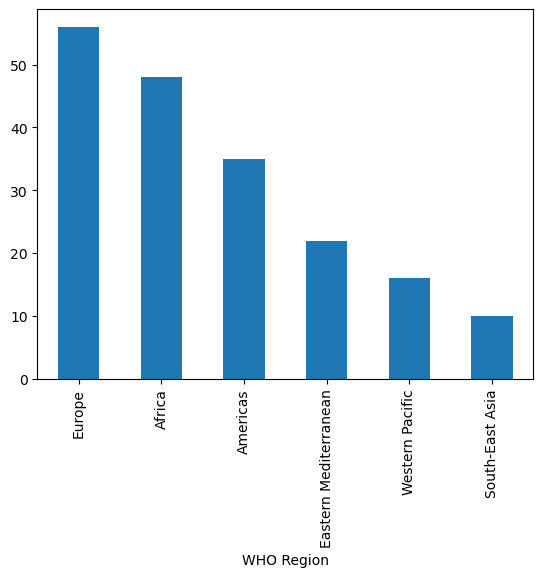

In [18]:
df["WHO Region"].value_counts().plot(kind="bar");

C:\Users\X1 Carbon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1 Carbon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1 Carbon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


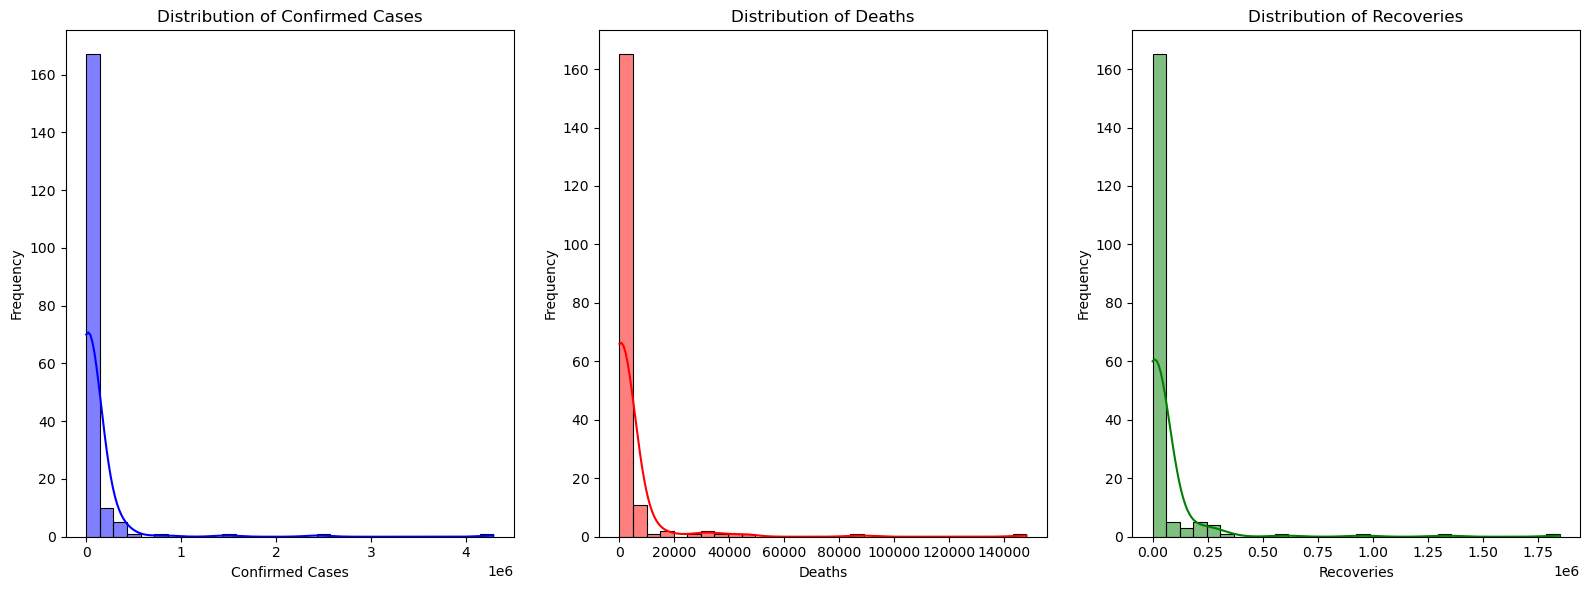

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Confirmed cases distribution
plt.subplot(1, 3, 1)
sns.histplot(df["Confirmed"], kde=True, bins=30, color="blue")
plt.title("Distribution of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")

# Deaths distribution
plt.subplot(1, 3, 2)
sns.histplot(df["Deaths"], kde=True, bins=30, color="red")
plt.title("Distribution of Deaths")
plt.xlabel("Deaths")
plt.ylabel("Frequency")

# Recovered distribution
plt.subplot(1, 3, 3)
sns.histplot(df["Recovered"], kde=True, bins=30, color="green")
plt.title("Distribution of Recoveries")
plt.xlabel("Recoveries")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

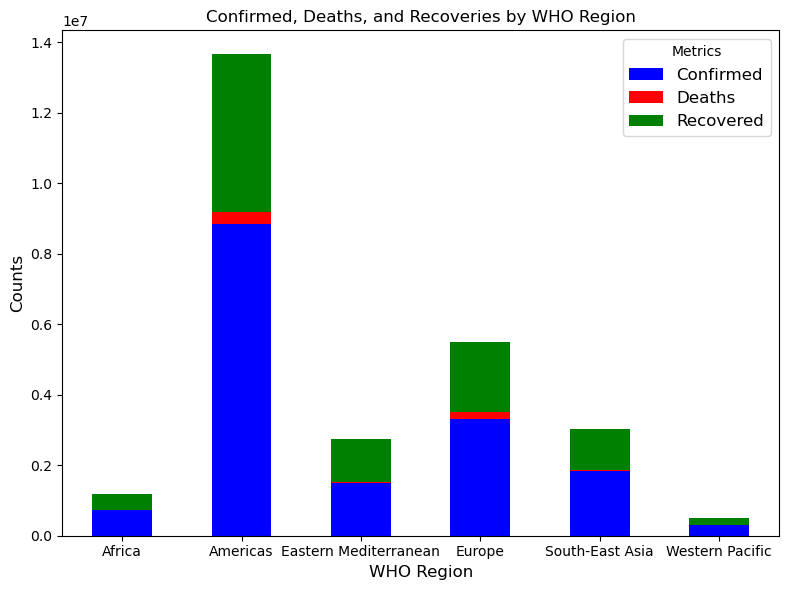

In [20]:
# Group data by WHO Region
region_summary = df.groupby("WHO Region")[["Confirmed", "Deaths", "Recovered"]].sum()

# Bar plot for metrics by WHO region
region_summary.plot(kind="bar", figsize=(8, 6), stacked=True, color=["blue", "red", "green"])
plt.title("Confirmed, Deaths, and Recoveries by WHO Region", fontsize=12)
plt.xlabel("WHO Region", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metrics", fontsize=12)
plt.tight_layout()
plt.show()

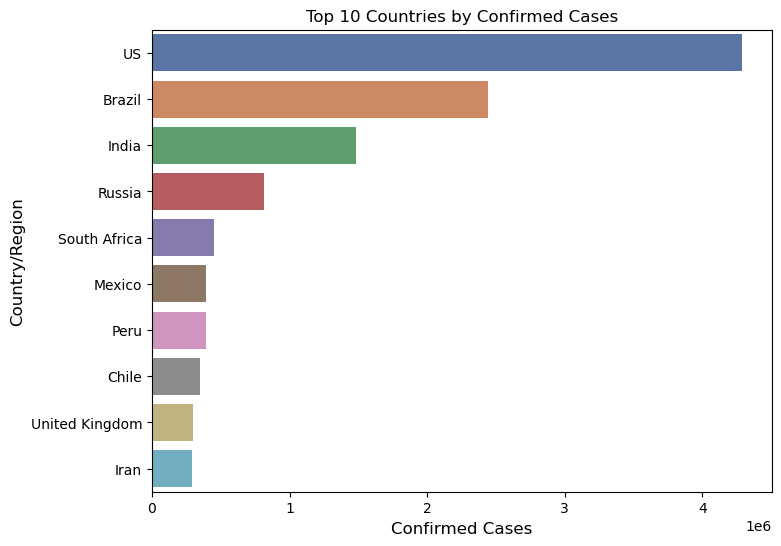

In [21]:
# Sort data for top 10 countries
top_10_confirmed = df.sort_values("Confirmed", ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_confirmed, x="Confirmed", y="Country/Region", palette="deep")
plt.title("Top 10 Countries by Confirmed Cases", fontsize=12)
plt.xlabel("Confirmed Cases", fontsize=12)
plt.ylabel("Country/Region", fontsize=12)
plt.show()

C:\Users\X1 Carbon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


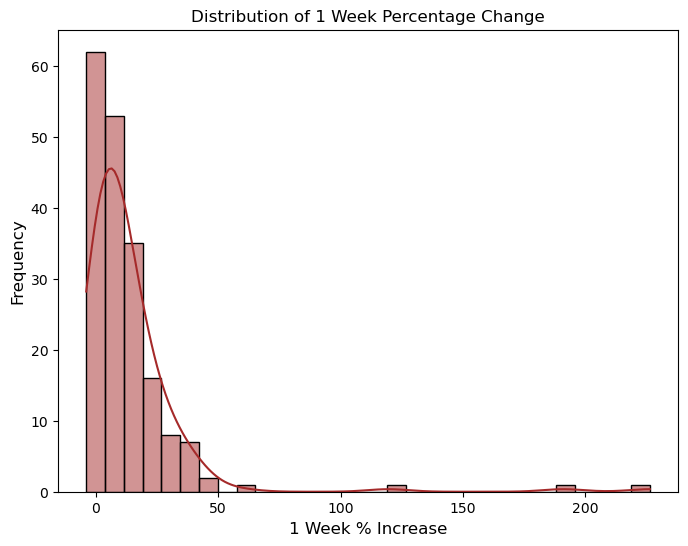

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df["1 week % increase"], kde=True, bins=30, color="brown")
plt.title("Distribution of 1 Week Percentage Change", fontsize=12)
plt.xlabel("1 Week % Increase", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [23]:
for label, content in df.items(): 
    if not pd.api.types.is_numeric_dtype(content): 
        print(label)

Country/Region
WHO Region


In [24]:
for label, content in df.items(): 
    if pd.api.types.is_numeric_dtype(content): 
        print(label)

Confirmed
Deaths
Recovered
Active
New cases
New deaths
New recovered
Deaths / 100 Cases
Recovered / 100 Cases
Deaths / 100 Recovered
Confirmed last week
1 week change
1 week % increase


In [26]:
df.covid = pd.read_csv("country_wise_latest.csv")
df.covid.head()

C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_9856\3472840589.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.covid = pd.read_csv("country_wise_latest.csv")


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Apply scaling to numeric columns
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
                'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',
                'Confirmed last week', '1 week change', '1 week % increase']

scaler = StandardScaler()
df_covidcovid[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Label Encoding the 'WHO Region' and 'Country/Region' columns
label_encoder = LabelEncoder()
df_covid['WHO Region'] = label_encoder.fit_transform(df_covid['WHO Region'])
df_covid['Country/Region'] = label_encoder.fit_transform(df_covid['Country/Region'])

# Verify changes
df_covid.head()

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [29]:
# Select only numeric columns from the dataframe
numeric_df = df.covid.select_dtypes(include=[np.number])
numeric_df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07
3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60
4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84


In [30]:
# Check for infinity values 
print("Checking for infinity values...")
print(np.isinf(numeric_df).sum())

Checking for infinity values...
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    5
Confirmed last week       0
1 week change             0
1 week % increase         0
dtype: int64


In [32]:
# Replace infinity with NaN 
df.covid.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [33]:
df.covid.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    5
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [34]:
# Fill NaN values with median 
df.covid.fillna(0, inplace=True)

In [35]:
df.covid.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [36]:
# Apply scaling to numeric columns 
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
                'Deaths / 100 Cases', 'Recovered / 100 Cases',
                'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase']

scaler = StandardScaler() 
df.covid[numeric_cols] = scaler.fit_transform(df.covid[numeric_cols])

# Label Encoding the 'WHO Region' and 'Country/Region' columns 
label_encoder = LabelEncoder() 
df.covid['WHO Region'] = label_encoder.fit_transform(df.covid['WHO Region']) 
df.covid['Country/Region'] = label_encoder.fit_transform(df.covid['Country/Region'])

In [38]:
df.covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,-0.135676,-0.158475,-0.134087,-0.113774,-0.196126,-0.158352,-0.218755,0.139470,0.178106,-0.103939,-0.127921,-0.183926,-0.471940,2
1,1,-0.217768,-0.238477,-0.252461,-0.150459,-0.194195,-0.191764,-0.208006,-0.020179,-0.326904,-0.103305,-0.220861,-0.184517,0.138838,3
2,2,-0.157361,-0.166013,-0.167623,-0.122342,-0.106576,-0.175058,-0.044145,0.331049,0.096099,-0.100528,-0.163001,-0.109080,0.182612,0
3,3,-0.228160,-0.245019,-0.262699,-0.159573,-0.212983,-0.241883,-0.223054,0.786775,0.904344,-0.099592,-0.230604,-0.199001,-0.450258,3
4,4,-0.228048,-0.245801,-0.265657,-0.156682,-0.211578,-0.233530,-0.223054,0.377492,-1.500937,-0.068019,-0.231004,-0.195242,0.541388,0


In [39]:
df.covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    int32  
 1   Confirmed               187 non-null    float64
 2   Deaths                  187 non-null    float64
 3   Recovered               187 non-null    float64
 4   Active                  187 non-null    float64
 5   New cases               187 non-null    float64
 6   New deaths              187 non-null    float64
 7   New recovered           187 non-null    float64
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    float64
 12  1 week change           187 non-null    float64
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    in

In [40]:
# split data into features(X) and label(y)
X = df.covid.drop("Deaths", axis=1)
y = df.covid["Deaths"]

In [41]:
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149, 14), (38, 14), (149,), (38,))

In [43]:
# Put model into dictionary 
np.random.seed(42)
models = {"RandomForest": RandomForestRegressor(),
         "LinearRegression": LinearRegression(), 
         "KNN": KNeighborsRegressor(),
         "GBR": GradientBoostingRegressor(), 
         "SVR": SVR()}

In [45]:
# Create a function to fit and score model 
def fit_and_score(models, X_train, y_train, X_test, y_test):
    # Create an empty dictionary
    model_scores = {}

    # create a random seed 
    np.random.seed(42) 

    # fit and evaluate the models 
    for model_name, model in models.items(): 
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Create an accuracy 
        r2 = model.score(X_test, y_test)
        model_scores[model_name] = r2 
    
        print(f"Model: {model_name}")
        print(f"Cofficient of Determination: {r2:.2f}")
        print("Mean absolute Error:")
        print(mean_absolute_error(y_test, y_pred))
        print("\n")

    return model_scores

model_scores = fit_and_score(models = models, 
                            X_train = X_train, 
                            y_train = y_train, 
                            X_test = X_test, 
                            y_test = y_test)

Model: RandomForest
Cofficient of Determination: 0.06
Mean absolute Error:
0.25511045603261673


Model: LinearRegression
Cofficient of Determination: 1.00
Mean absolute Error:
1.1174906029771435e-14


Model: KNN
Cofficient of Determination: -0.07
Mean absolute Error:
0.294183633316596


Model: GBR
Cofficient of Determination: -0.37
Mean absolute Error:
0.2949828099651521


Model: SVR
Cofficient of Determination: -0.05
Mean absolute Error:
0.32240419853798236




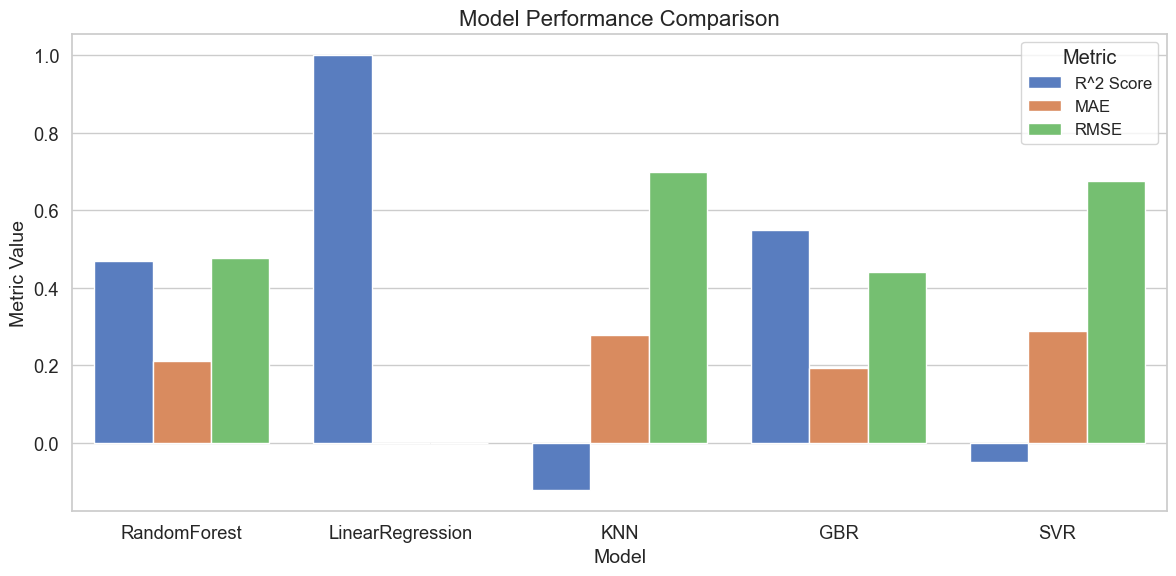

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_model_results(models, r2_scores, mae_values, rmse_values):
    """
    Plots a comparison of R^2, MAE, and RMSE for multiple models.

    Parameters:
    - models: List of model names (str).
    - r2_scores: List of R^2 values for the models.
    - mae_values: List of MAE values for the models.
    - rmse_values: List of RMSE values for the models.
    """
    # Set up the plotting environment
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)
    
    # Create a DataFrame for better visualization
    import pandas as pd
    data = pd.DataFrame({
        "Model": models,
        "R^2 Score": r2_scores,
        "MAE": mae_values,
        "RMSE": rmse_values
    })
    
    # Melt the DataFrame for grouped bar plots
    data_melted = data.melt(id_vars="Model", var_name="Metric", value_name="Value")
    
    # Plot grouped bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data_melted, x="Model", y="Value", hue="Metric")
    
    # Customize the plot
    plt.title("Model Performance Comparison", fontsize=16)
    plt.ylabel("Metric Value", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.legend(title="Metric", loc="upper right", fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
models = ["RandomForest", "LinearRegression", "KNN", "GBR", "SVR"]
r2_scores = [0.47, 1.00, -0.12, 0.55, -0.05]
mae_values = [0.211976, 7.71e-15, 0.277782, 0.194541, 0.289457]
rmse_values = [0.477287, 9.05e-15, 0.698182, 0.440391, 0.675017]

# Call the function
compare_model_results(models, r2_scores, mae_values, rmse_values)

In [47]:
# let see if we can improve the result of the Gradient Boost Regression 
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.7, 1.0]}

In [48]:
model = GradientBoostingRegressor()

random_gb = RandomizedSearchCV(model,
                     param_grid, 
                     cv=3,
                     n_jobs=-1, 
                    n_iter = 20)
random_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.7, 1.0]})

In [49]:
random_gb.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 3,
 'learning_rate': 0.05}

In [50]:
random_gb.score(X_test, y_test)

-0.9707109299666099

In [51]:
# Find feature importance 
best_model = random_gb.best_estimator_

feature_importance = best_model.feature_importances_

In [52]:
feature_importance

array([0.00491793, 0.00793967, 0.02124598, 0.13558444, 0.14840548,
       0.19483724, 0.14804125, 0.03586979, 0.00939733, 0.0178425 ,
       0.07806949, 0.19148146, 0.00603747, 0.00032997])

In [53]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

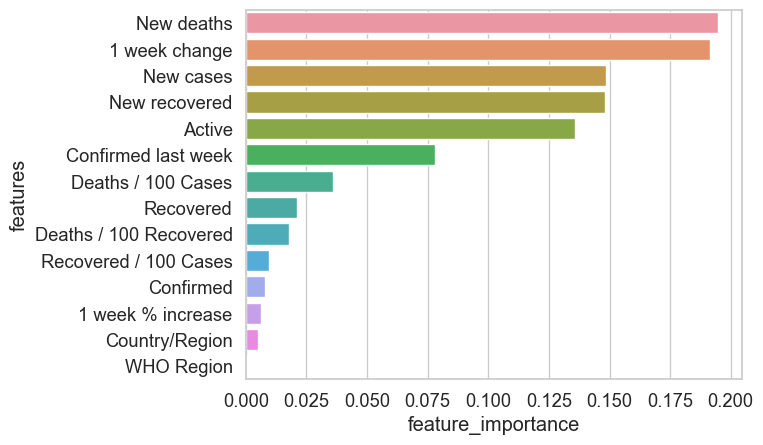

In [55]:
plot_features(X_train.columns, feature_importance)

In [54]:
# Save mmodel
import joblib

In [56]:
joblib.dump(random_gb, "covid19_Deaths.joblib")

['covid19_Deaths.joblib']